<a href="https://colab.research.google.com/github/surendra-crax/120Days-DataScience/blob/main/Day12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving titanic.csv to titanic.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("titanic.csv")

In [ ]:
#identify & Inspect Categorical Columns
cat_columns = df.select_dtypes(include="object").columns
cat_columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [ ]:
for col in cat_columns:
    print(f"--- {col} ---")
    print(df[col].value_counts())
    print()


--- Name ---
Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Hewlett, Mrs. (Mary D Kingcome)                        1
Vestrom, Miss. Hulda Amanda Adolfina                   1
Andersson, Mr. Anders Johan                            1
Saundercock, Mr. William Henry                         1
Bonnell, Miss. Elizabeth                               1
Name: count, Length: 891, dtype: int64

--- Sex ---
Sex
male      577
female    314
Name: count, dtype: int64

--- Ticket ---
Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450              1
ST

In [ ]:
#Calculate Survival Rate by Sex
df.groupby("Sex")["Survived"].mean()

,Survived
Sex,
female,0.742038
male,0.188908


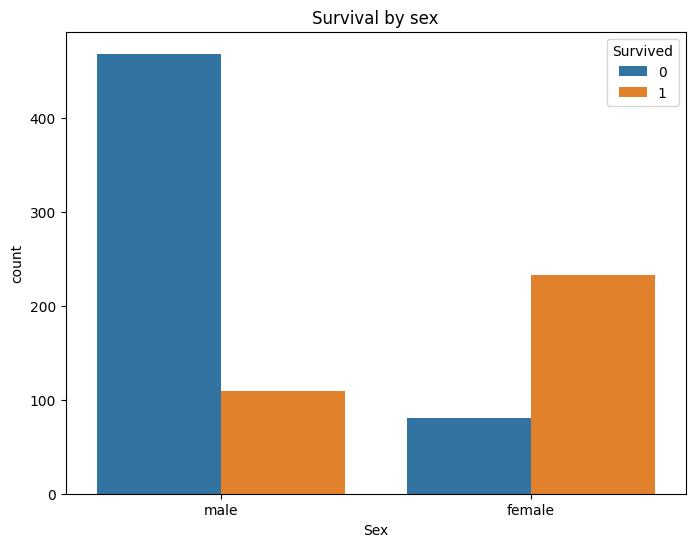

In [ ]:
#visualizing
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="Sex", hue="Survived")
plt.title("Survival by sex")
plt.show()

Sex is one of the strongest predictors of survival in the Titanic dataset.

In [ ]:
df.groupby("Pclass")["Survived"].mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


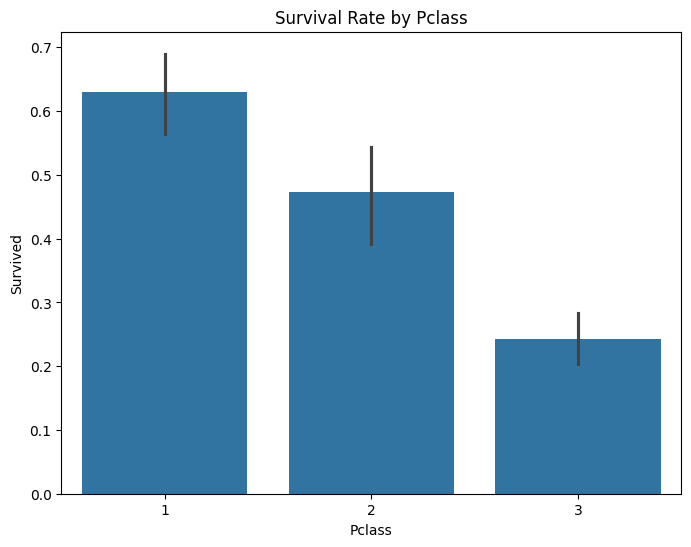

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data=df,x="Pclass",y="Survived")
plt.title("Survival Rate by Pclass")
plt.show()


Pclass strongly influences survival — higher class = higher chance of living.

In [ ]:
#Group Survival by Sex + Pclass
df.groupby(["Sex","Pclass"])["Survived"].mean()

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

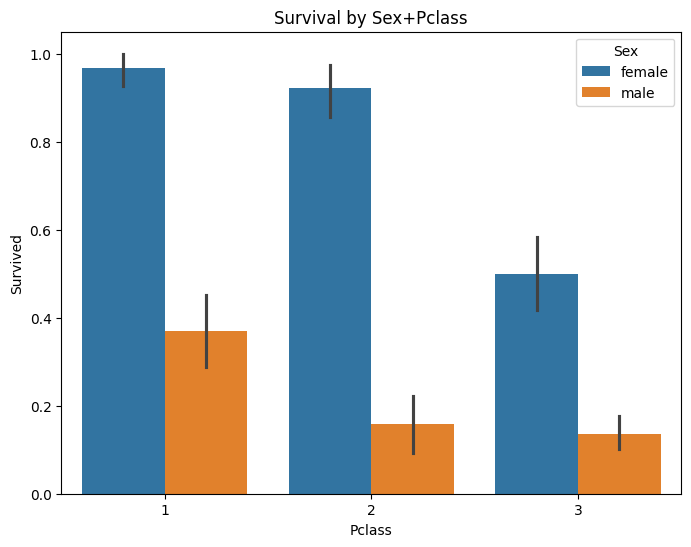

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data=df,x="Pclass",y="Survived",hue="Sex")
plt.title("Survival by Sex+Pclass")
plt.show()

Gender and Passenger Class together explain a major portion of the survival pattern.

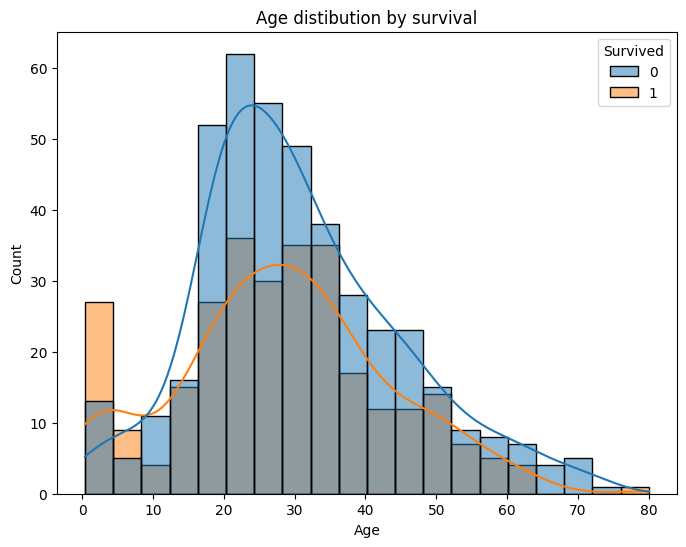

In [ ]:
#Plot Age Distribution for Survivors vs Non-survivors
plt.figure(figsize=(8,6))
sns.histplot(data=df,x="Age",hue="Survived",kde=True)
plt.title("Age distibution by survival")
plt.show()

In [ ]:
#Group Ages Into Meaningful Categories
df["AgeGroup"] = pd.cut(df["Age"],bins=[0,12,19,50,80],labels=["Child","Teen","Adult","Senior"])

In [ ]:
df.groupby("AgeGroup")["Survived"].mean()

/tmp/ipython-input-2602041343.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("AgeGroup")["Survived"].mean()


,Survived
AgeGroup,
Child,0.579710
Teen,0.410526
Adult,0.388889
Senior,0.343750


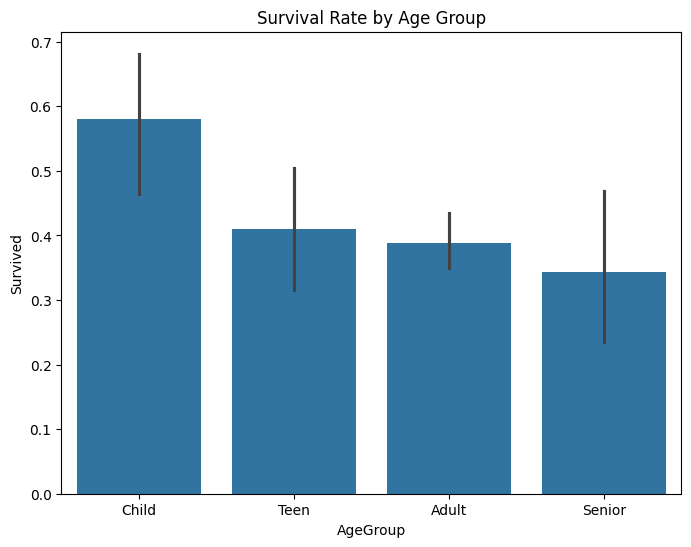

In [ ]:
#Visualize AgeGroup Survival
plt.figure(figsize=(8,6))
sns.barplot(data=df,x = "AgeGroup", y="Survived")
plt.title("Survival Rate by Age Group")
plt.show()

Age is a moderately important predictor, especially when combined with:

- Sex

- Pclass

- Family size

This prepares you for feature engineering later.

#Final Insight Summary + Choosing Top 5 Visualizations
📌 Final Insights from Titanic EDA — Part 2
1. Gender strongly influences survival

- Females had a much higher survival rate than males.

- Countplot shows most males did not survive.

2. Passenger Class is a major survival factor

- 1st class passengers survived the most.

- 3rd class passengers had the lowest survival rate.

3. Combining Sex and Pclass reveals the strongest pattern

- 1st class females had the highest survival rate.

- 3rd class males had the worst survival rate.

- This combined feature gives deep insight that single features cannot show.

4. Age also impacts survival

- Children (0–12) were more likely to survive.

- Adults and seniors had lower survival chances.

- Age distribution shows clear differences between survivors and non-survivors.

5. Important Feature Ranking (by insight strength)

- Sex

- Pclass

- Sex + Pclass

- Age

- Family features (SibSp, Parch — important for Day 13)